
show example page 135
prior: how does an uninformative prior contribute to the posterior
sample size: how does contribute to the posterior

# Analytical Approach to Derive Posterior Distribution

In this hands-on session, you will visually check the posterior distribution based on the *Analytical Approach*. Remember that when the prior is Beta or Gamma, the posterior distribution has a closed-form solution, and is also Beta or Gamma, respectively. We will use the `scipy.stats` module to plot the posterior distribution.

<div class="alert alert-success">
<b>Case of Beta prior and Bernoulli likelihood</b>


You will go through the following steps: 

- Plot the prior distribution as a Beta distribution
- Plot the likelihood distribution as a Bernoulli distribution
- Plot the posterior distribution as a Beta distribution

Let's start by importing the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

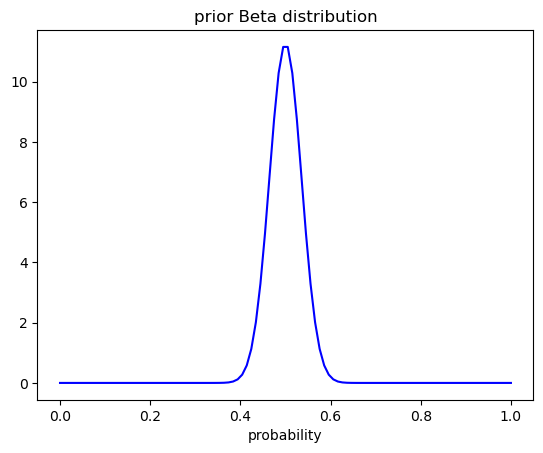

In [37]:
# set the parameters (-inf < a < b < inf)
a0, b0 = 100,100

# plot probability distribution
x = np.linspace(0,1,100)

plt.plot(x, beta.pdf(x, a0,b0), 'b-')
plt.xlabel('probability')
plt.title('prior Beta distribution')

plt.show()

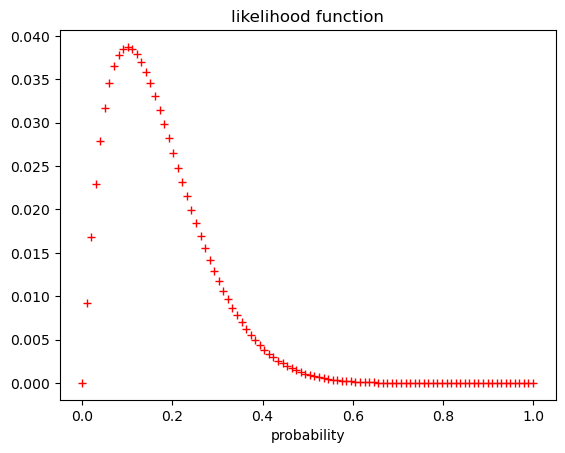

In [38]:
# N is the number of flips, and heads is the number of heads
N, n_heads = 10, 1
plt.plot(x, x**n_heads * (1-x)**(N-n_heads), 'r+')

plt.xlabel('probability')
plt.title('likelihood function')
plt.show()

101 109


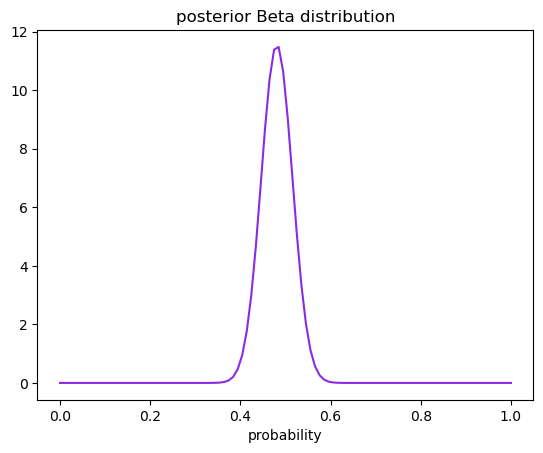

In [36]:
# set the parameters 
a, b = a0 + n_heads, N - n_heads + b0
print(a,b)

plt.plot(x, beta.pdf(x, a, b), 'blueviolet')
plt.title('posterior Beta distribution')
plt.xlabel('probability')
plt.show()

Let's put all the three plots together in a single figure.

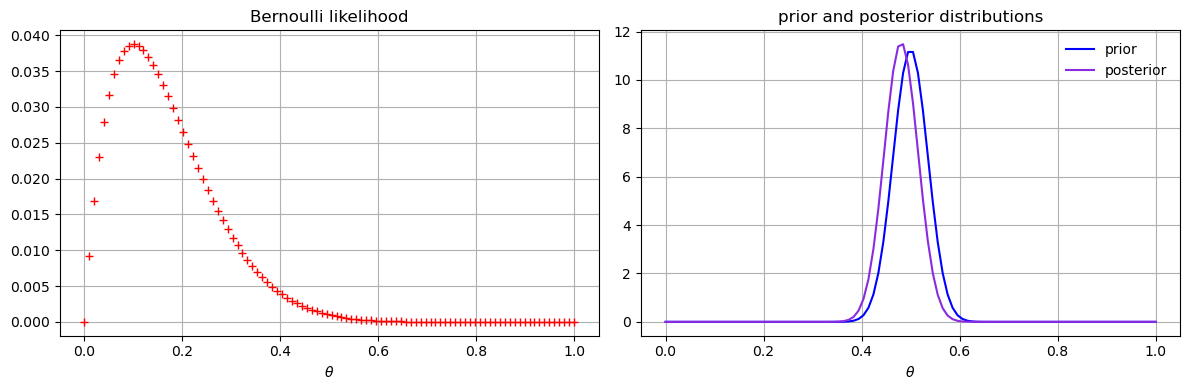

In [39]:
# create all plots in a row
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# set the parameters 
a, b = 100, 100
N = 10
n_heads = 1

# create a grid of theta values
theta = np.linspace(0,1,100)

# plot Bernoulli likelihood
axes[0].plot(theta, theta**n_heads * (1-theta)**(N-n_heads), 'r+')

axes[0].set_xlabel(r'$\theta$')
axes[0].set_title('Bernoulli likelihood')
axes[0].grid()

# plot probability distribution
axes[1].plot(theta, beta.pdf(theta, a,b), 'b-', label='prior')
axes[1].plot(theta, beta.pdf(theta, a+n_heads, b+N-n_heads), 'blueviolet', label='posterior')

axes[1].set_xlabel(r'$\theta$')
axes[1].set_title('prior and posterior distributions')
axes[1].legend(loc='best', frameon=False)
axes[1].grid()

plt.tight_layout()
plt.show()

**Discussion**:

Here we are interested in the posterior distribution of $\theta$ given the evidence from fliping the coin and the prior distribution of $\theta$. The posterior distribution is proportional to the product of the likelihood and the prior.


Suppose that we have flipped the coin 10 times and observed 1 head. From the evidence the probability of head is 0.1. Let's assume that the outcome of the coin flip is a Bernoulli random variable with parameter $\theta$.

We are interested in the posterior distribution of this probability given the observed evidence and the prior distribution of $\theta$.

If we assume that the prior distribution of $\theta$ is a `Beta(a,b)`, then luckily the posterior distribution of $\theta$ is also `Beta(a+1,b+10-1)`.

**Observation 1**:

**Observation 2**:



<div class="alert alert-success">
<b>Case of Gamma prior and Exponential likelihood</b>



Similar to the Beta distribution which is conjugate to the Bernoulli distribution, the Gamma distribution is conjugate to the Exponential distribution. This means that if we have a Gamma prior distribution and we observe data from a Exponential distribution, then the posterior distribution is also a Gamma distribution. This is a very useful property, because it means that we can update our beliefs about the parameters of a Gamma distribution in a closed-form way. 

Let's re-do the above example for the Gamma distribution. You will go through the following steps: 

- Plot the prior distribution as a Gamma distribution
- Plot the likelihood distribution as an Exponential distribution
- Plot the posterior distribution as a Gamma distribution

Start by importing the `gamma` function from the `scipy.stats` module.

In [3]:
from scipy.stats import gamma

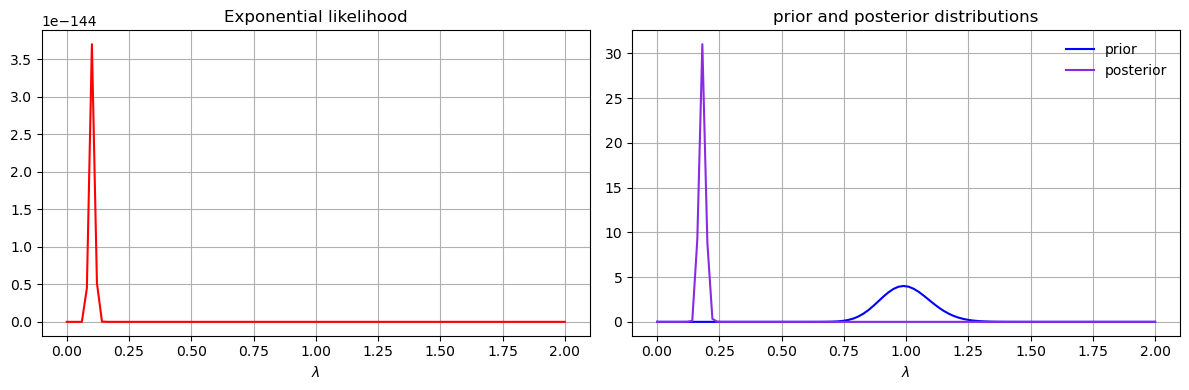

In [41]:
# create the prior, likelihood and posterior Gamma distributions in one row of plots
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# set the parameters of the prior
a, b = 100, 100

# set the parameters of the likelihood 
# number of payers and total pay
n_payers, total_pay = 100, 1000

# create a grid of lambda values
lamda = np.linspace(0, 2, 100)

# plot exponential likelihood
axes[0].plot(lamda, lamda**n_payers * np.exp(-lamda*total_pay) , 'r')

axes[0].set_xlabel(r'$\lambda$')
axes[0].set_title('Exponential likelihood')
axes[0].grid()

# plot probability distribution
axes[1].plot(lamda, gamma.pdf(lamda, a=a, scale=1/b), 'b-', label='prior')
axes[1].plot(lamda, gamma.pdf(lamda,  a=a+n_payers, scale=1/(b+total_pay)), 'blueviolet', label='posterior')

axes[1].set_xlabel(r'$\lambda$')
axes[1].set_title('prior and posterior distributions')
axes[1].legend(loc='best', frameon=False)
axes[1].grid()

plt.tight_layout()
plt.show()


**Discussion**:

Here we are interested in the posterior distribution of $\lambda$ given an observed evidence and the prior distribution of $\lambda$. The posterior distribution is proportional to the product of the likelihood and the prior.  

Suppose that 100 visitors have visited an exibition, and donated a sum of 1000. The evidence shows that the donation amount is 10 per visitor. Let's assume that the donation amount is exponentially distributed with rate $\lambda$. 

We are interested in the posterior distribution of $\lambda$ given the observed evidence and the prior distribution of $\lambda$.

If we assume that the prior distribution of $\lambda$ is a `gamma(a,b)`, then luckily the posterior distribution of $\lambda$ is also `gamma(a+100,b+1000)`.

**Observation 1**:

**Observation 2**:



## advanced Exercises: solution posted later. no need to be done in class
- change the prior distribution: informative priors vs uninformative priors e.g. uniform distribution https://en.wikipedia.org/wiki/Beta_distribution#Bayesian_inference
- impact of sample size